In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

1. caricare i dati in un dataframe


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv")

2. visualizzare i dati


In [3]:
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. eliminare dal dataframe tutti i record con valori NaN


In [4]:
df.dropna(inplace=True)
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,Japanese,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,Japanese,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


4. calcolare il numero di show per ogni lingua. Ordinare in ordine decrescente sul numero


In [5]:
df2 = df.groupby("Language")["Name of the show"].count().sort_values(ascending=False)
df2

Language
English     155
Hindi        17
Japanese      7
Suomi         1
Spanish       1
Deutsch       1
Name: Name of the show, dtype: int64

5. visualizzare il grafico a barre verticali dei dati precedenti


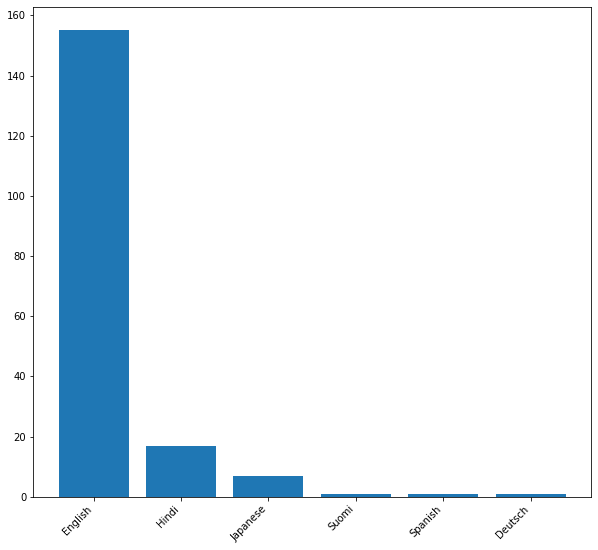

In [6]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
fig.autofmt_xdate(rotation=45)
ax.bar(df2.index, df2.values)
plt.show()

6. visualizzare le stesse informazioni dell'esercizio precedente utilizzando un grafico a torta


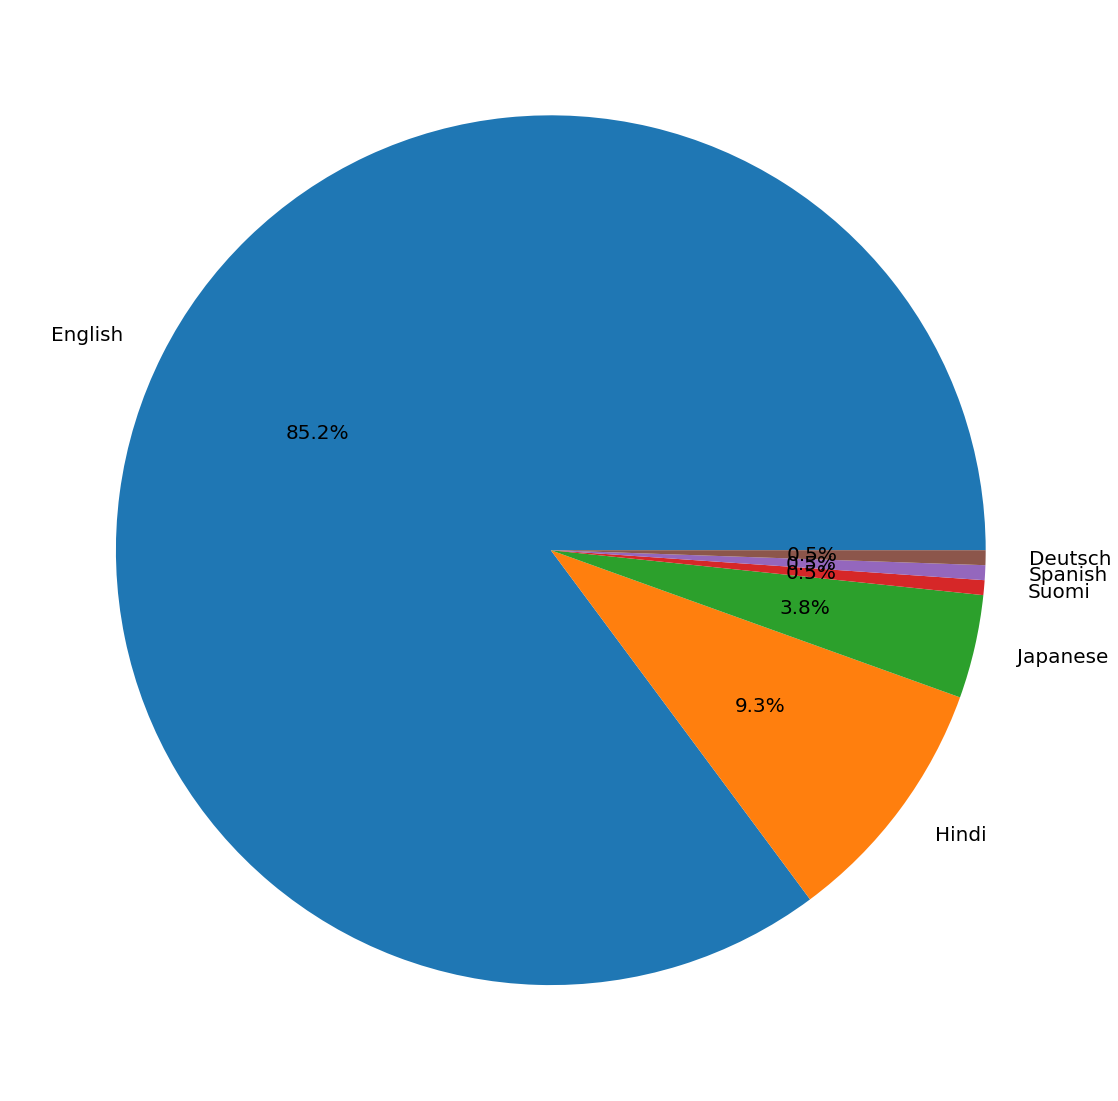

In [7]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes()
plt.rcParams.update({"font.size" : 20})
ax.pie(df2.values, labels=df2.index, autopct = "%.1f%%", startangle = 0)
plt.show()

7. creare un nuovo dataframe che nella colonna 'Language' contenga solo 'English' o 'non English'


In [8]:
df3 = df
df3["Language"][df3["Language"] != "English"] = "non English"
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,non English,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,non English,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,non English,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,non English,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


In [25]:
df4 = df3.groupby(["Year of release", "Language"]).count().reset_index()
df4.drop(df4["Year of release"] >= 2011.0)

KeyError: ignored

8. visualizzare un grafico a barre con gli anni sulle ascisse e il numero di show in inglese e non in inglese sulle ordinate. Considerare solo gli ultimi 10 anni (vedi grafico allegato come esempio)


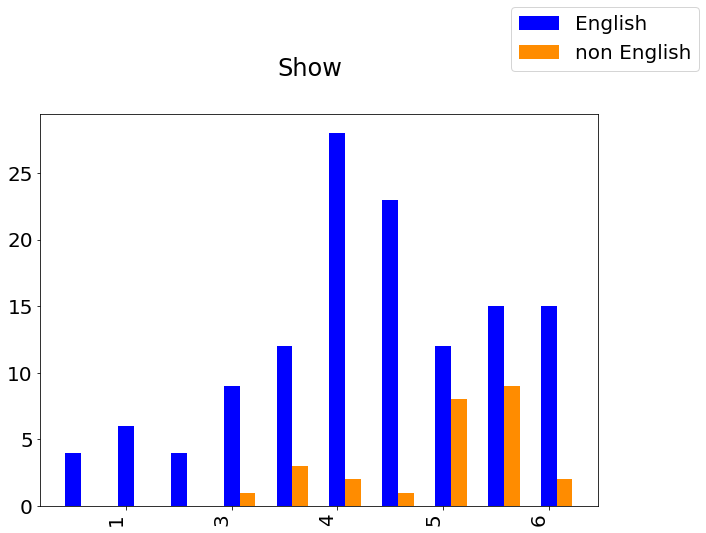

In [17]:
fig = plt.figure(figsize=(10,8)) 
ax = plt.axes()
ax.bar(df4.index,df4["English"],label="English",width=0.3,color="blue")
ax.bar(df4.index+0.3,df4["non English"],label="non English",width=0.3,color="#ff8c00")
fig.autofmt_xdate(rotation=90)
fig.suptitle("Show")
x_labels = [1,1,3,4,5,6,7,8,9,10]
ax.set_xticklabels(x_labels)
ax.legend(bbox_to_anchor=(1.2, 1.3))
plt.show()

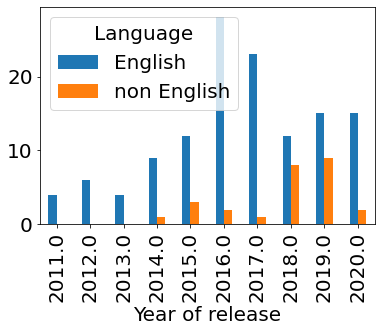

In [59]:
df3[df3["Year of release"] >= datetime.now().year - 10].groupby(["Language"])["Year of release"].value_counts().unstack(0).plot.bar()
plt.show()

TypeError: ignored

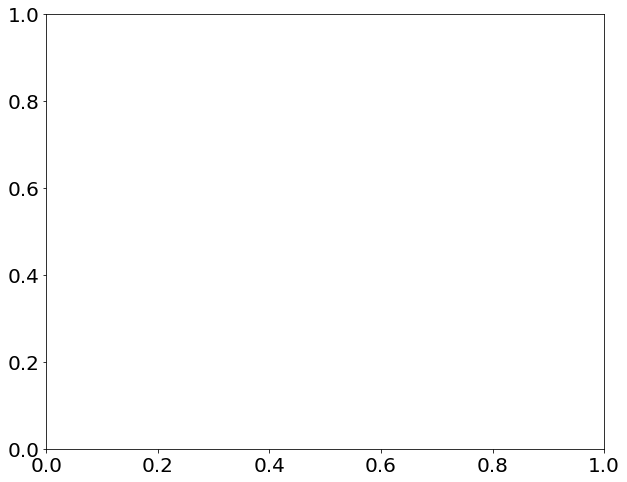

In [60]:
fig = plt.figure(figsize=(10,8)) 
ax = plt.axes()
ax.bar(dfA["Year of release"],dfA["English"],label="English",width=0.3,color="blue")
ax.bar(dfA["Year of release"]+0.3,dfA["non English"],label="non English",width=0.3,color="#ff8c00")
fig.autofmt_xdate(rotation=90)
fig.suptitle("Show")
plt.show()